# Aproximace funkcí II, třídění

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Metoda nejmenších čtverců

* Aproximační funkce [neprochází](https://miro.medium.com/max/1400/1*bqEcfSxeYrHx63_pHlmnIQ.png) zadanými body (např. při aproximaci výsledků měření s nezanedbatelnými chybami)
* Naměřené hodnoty proložíme takovou aproximační funkcí $f(x)$, která minimalizujeme funkcionál 
$$
\tilde{S} = \sqrt{\sum_{i=1}^{n}w_{i}\left[y_{i} - f(x_{i})\right]^{2}}
$$
* Aproximační funkce může být např.
 * Lineární (odvození uděláme v rámci cvičení)
 * Kvadratická [(odvození)](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/DOCS/teorie_metoda_nejmensich_ctvercu.pdf)
 
* John von Neumann: "*With four parameters I can fit an elephant, and with five I can make him wiggle his trunk.*" [[zdroj]](http://dx.doi.org/10.1038/427297a)
* Problémy statistické regrese - [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

<div class="alert alert-block alert-warning"><b>Cvičení 06.01: </b> Naprogramujte metodu nejmenších čtverců pro lineární aproximaci $f(x) = kx+q$ naměřených hodnot $x=\{1, 2, 3, 4\}$ a $y=\{6, 5, 7, 10\}$.</div>

Parametr k:  1.3999999999999995
Parametr q:  3.5000000000000018


Text(0.5, 1.0, 'Aproximace metodou nejmensich ctvercu')

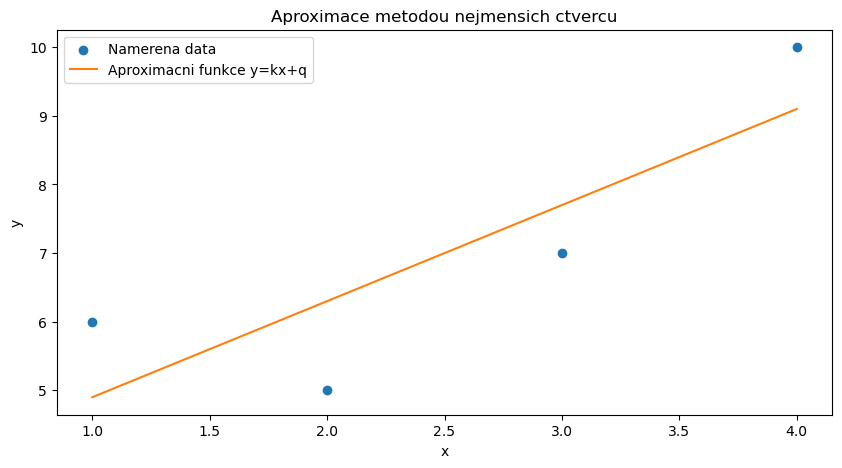

In [2]:
#
x = np.array([1, 2, 3, 4])
y = np.array([6, 5, 7, 10])
n = x.size

# predpokladame linearni aproximacni polynom y = kx + q
# minimum fukncionalu S najdeme pomoci derivace
# to vede na reseni soustavy lin. rovnic
# ze soustavy lin. rovnic vypocitame koeficienty k, q
# np.sum() = suma
A = np.array([
    [np.sum(x*x), np.sum(x)],
    [np.sum(x), n]
    ])

b = np.array([np.sum(x*y), np.sum(y)])

# ziskame koeficienty
reseni = np.linalg.solve(A,b)
k = reseni[0]
q = reseni[1]

print('Parametr k: ',k)
print('Parametr q: ',q)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y,label='Namerena data')
ax.plot(x,k*x+q, color='C1', label='Aproximacni funkce y=kx+q')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Aproximace metodou nejmensich ctvercu')

## Řazení

### Řazení vkládáním (insertion sort)

* Postupně procházíme prvky a každý další nesetříděný prvek zařadíme na správné místo do již setříděné posloupnosti.
* [Animace](https://www.youtube.com/watch?v=OGzPmgsI-pQ)
* Dokáže řadit data tak, jak přicházejí na vstup.

<div class="alert alert-block alert-warning"><b>Cvičení 06.02: </b>Doplňte kód pro implementaci řazení vkládáním.</div>

In [13]:
# kod
 
def insertion_sort(arr):
 
    # prochazim pole od 1 do n -1
    for i in range(1, arr.size): # i=1,2,3,4
 
        klic = arr[i]
        j = i-1
        while j >= 0 and arr[j] > klic : #prvky arr[0..i-1], ktere jsou vetsi nez klic
                arr[j + 1] = arr[j] # posunu doprava
                j -= 1 
        arr[j + 1] = klic
 
arr = np.array([12, 11, 13, 5, 6])
print('Nesetridene pole:')
print(arr)

insertion_sort(arr)

print('Setridene pole:')
print(arr)

Nesetridene pole:
[12 11 13  5  6]
Setridene pole:
[ 5  6 11 12 13]


### Řazení výběrem (selection sort)

* Postupně procházíme prvky a hledáme minimum z neseřazené části.
* Nalezené minimum zařadíme na začátek seřazené části.
* [Animace](https://www.youtube.com/watch?v=xWBP4lzkoyM)

<div class="alert alert-block alert-warning"><b>Cvičení 06.03: </b>Doplňte kód pro implementaci řazení výběrem.</div>

In [14]:
# kod
 
def selection_sort(arr):
 
    # prochazim pole od 0 do n - 1
    for i in range(arr.size):
 
        klic_index = i # index klice
 
        for j in range (i+1,arr.size): # projdeme pole od i+1. prvku do konce
            if arr[klic_index] > arr[j]:   # pokud je zkoumany j-ty prvek mensi
                klic_index = j        # ulozime si jeho index
 
        arr[klic_index], arr[i] = arr[i], arr[klic_index] # prohodime aktualni a nalezeny prvek
        
        # protoze jsme prosli cely zbytek pole, je ted na i-tem miste i-ty
        # nejmensi prvek, a muzeme pokracovat tridenim zbytku pole

arr1 = np.array([8, 14, 11, 1, 32])
print('Nesetridene pole:')
print(arr1)

selection_sort(arr1)

print('Setridene pole:')
print(arr1)



Nesetridene pole:
[ 8 14 11  1 32]
Setridene pole:
[ 1  8 11 14 32]


### Quick sort (rychlé řazení)

* [Animace](https://www.youtube.com/watch?v=PgBzjlCcFvc)

In [15]:
# kod

def partition(array, low, high):
    # pivot bude prvek na konci pole
    pivot = array[high]
    
    # ukazatel na vetsi prvek
    i = low - 1

    for j in range(low, high): # prochazim celym polem
      if array[j] <= pivot: # porovnavam kazdy prvek s pivotem
        i = i + 1 # pokud je prvek mensi nez pivot, posuneme ukazatel i

        # prohozeni prvku i a j
        (array[i], array[j]) = (array[j], array[i])
        
    # prohozeni pivota s vetsim prvkem
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    return i + 1


def quick_sort(array, low, high):
    if low < high:

      # najdu pivot tak, ze prvky mensi nez pivot jsou vlevo, prvky vetsi nez pivot jsou vpravo
      pi = partition(array, low, high)

      # rekurze pro prvky nalevo od pivotu
      quick_sort(array, low, pi - 1)

      # rekurze pro provky napravo od pivotu
      quick_sort(array, pi + 1, high)


arr3 = np.array([8, 7, 2, 1, 0, 9, 6])
print('Nesetridene pole:')
print(arr3)

delka = arr3.size

quick_sort(arr3, 0, delka - 1)

print('Setridene pole:')
print(arr3)


Nesetridene pole:
[8 7 2 1 0 9 6]
Setridene pole:
[0 1 2 6 7 8 9]


### Heapsort (řazení haldou)

* [Animace](https://www.youtube.com/watch?v=MtQL_ll5KhQ)

In [6]:
# kod

# vytvoreni haldy
def heapify(arr, n, i):
    largest = i 
    l = 2 * i + 1	 # levy = 2*i + 1
    r = 2 * i + 2	 # pravy = 2*i + 2


    # je levy potomek vetsi nez rodic?
    if l < n and arr[largest] < arr[l]:
        largest = l

    # je pravy potomek vetsi nez rodic?
    if r < n and arr[largest] < arr[r]:
        largest = r

    # zmena rodice
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i] # prohozeni
        heapify(arr, n, largest)

# razeni
def heap_sort(arr):
    n = len(arr)

    # vytvoreni haldy
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    # smazani jednolitych elemetu
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # prohozeni
        heapify(arr, i, 0)



arr4 = np.array([12, 5, 13, 11, 6, 7])
print('Nesetridene pole:')
print(arr4)

heap_sort(arr4)

print('Setridene pole:')
print(arr4)

Nesetridene pole:
[12  5 13 11  6  7]
Setridene pole:
[ 5  6  7 11 12 13]


Zdroj a více informací ke třídícím algoritmům [zde](https://www.geeksforgeeks.org/sorting-algorithms/?ref=gcse).